****
**Introduction**

This project aims to improve public transportation by using data analysis and machine learning. We will explore the provided dataset, identify issues, and preprocess the data. Our goal is to predict service disruptions and analyze passenger feedback sentiment. With the power of machine learning, we'll uncover insights to enhance transportation services. This document outlines our step-by-step approach.

1. **Data Exploration and Understanding**
    * Load the dataset using Pandas.
    * Our focus will be on understanding the dataset's structure, consisting of 6 columns: TripID, RouteID, StopID, StopName, WeekBeginning, and NumberOfBoardings and understand the column meanings, and potential relationships between variables.
    * Identify data quality issues, missing values, and outliers.
   ****
2. **Data Preprocessing**
    * Select relevant columns for analysis (e.g., TripID, RouteID, StopName).
    * Handle missing data, duplicates, and irrelevant entries.
    * Convert data types if needed
    **** 

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
data = pd.read_csv('/kaggle/input/unisys/20140711.CSV')

/tmp/ipykernel_1027/926775581.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/unisys/20140711.CSV')


In [3]:
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'])
print("done")

done


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10857234 entries, 0 to 10857233
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TripID             int64         
 1   RouteID            object        
 2   StopID             int64         
 3   StopName           object        
 4   WeekBeginning      datetime64[ns]
 5   NumberOfBoardings  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 497.0+ MB


In [5]:
data.describe()

,TripID,StopID,WeekBeginning,NumberOfBoardings
count,1.085723e+07,1.085723e+07,10857234,1.085723e+07
mean,2.952100e+04,1.366132e+04,2014-01-01 19:10:50.311710720,4.743737e+00
min,7.900000e+01,1.000100e+04,2013-06-30 00:00:00,1.000000e+00
25%,1.191700e+04,1.231100e+04,2013-09-29 00:00:00,1.000000e+00
50%,2.747900e+04,1.334600e+04,2014-01-05 00:00:00,2.000000e+00
75%,4.885800e+04,1.491600e+04,2014-04-06 00:00:00,4.000000e+00
max,6.553500e+04,1.871500e+04,2014-07-06 00:00:00,9.770000e+02
std,1.960938e+04,1.971760e+03,NaN,9.382286e+00


In [6]:
# number of unique values in dataset per column
print(data['TripID'].nunique(), 
data['RouteID'].nunique(),
data['StopID'].nunique(),
data['StopName'].nunique(),
data['WeekBeginning'].nunique(),
data['NumberOfBoardings'].nunique())

39282 619 7397 4165 54 400


****
3. **Predicting Service Disruptions**
    * Innovation: Define how service disruption is determined from given features
    * Select a set of features and Service Disruption as target feature
    * Create DecisionTreeClassifier and train on 80% of dataset
    * Test the classifier on remaining 20% of dataset
****

In [7]:
# aggregate data at route and week level
agg_data = data.groupby(['RouteID', 'WeekBeginning'])['NumberOfBoardings'].sum().reset_index()
print('done')

done


In [8]:
# set WeekBeginning as index
agg_data.set_index('WeekBeginning', inplace=True)
print('done')

done


In [9]:
# define service disruption

# set mean as threshold for service disruption
threshold = data['NumberOfBoardings'].mean()

# create binary target variable (1 for disruption, 0 for no disruption)
data['ServiceDisruption'] = (data['NumberOfBoardings'] < threshold).astype(int)
print('done')

done


In [10]:
# display frequency of service disruption
print("No service disruption: ", data[data['ServiceDisruption']==0]['TripID'].count(),
"\nService disruption: ",data[data['ServiceDisruption']==1]['TripID'].count())

No service disruption:  2668820 
Service disruption:  8188414


In [11]:
data['DayOfWeek'] = data['WeekBeginning'].dt.dayofweek
print('done')

done


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10857234 entries, 0 to 10857233
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TripID             int64         
 1   RouteID            object        
 2   StopID             int64         
 3   StopName           object        
 4   WeekBeginning      datetime64[ns]
 5   NumberOfBoardings  int64         
 6   ServiceDisruption  int64         
 7   DayOfWeek          int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(2)
memory usage: 621.3+ MB


In [12]:
#decision tree classifier to predict service disruption from 2 features

features = ['NumberOfBoardings', 'DayOfWeek']
target = 'ServiceDisruption'

#  gather training and testing sets from data
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# create and train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# print(predictions)
# print('done')

# eval
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [13]:
# print clsfctn report for above decision tree classifier using 2 features
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    533163
           1       1.00      1.00      1.00   1638284

    accuracy                           1.00   2171447
   macro avg       1.00      1.00      1.00   2171447
weighted avg       1.00      1.00      1.00   2171447



In [ ]:
# to predict service disruption using random forest classifier on 2 features

features = ['NumberOfBoardings', 'DayOfWeek']  # Replace with your feature columns
target = 'ServiceDisruption'  # The target variable

# obtain training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier and train it
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# eval
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [17]:
data_copy = data.copy(deep=True)
print('done')

In [19]:
# predict service disruption using decision tree classifier on 4 features

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = ['TripID', 'StopID', 'NumberOfBoardings','DayOfWeek']
target = 'ServiceDisruption'  

# obtain training and testing sets
X = data_copy[features]
y = data_copy[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create DecisionTreeClassifier and train it
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# test classifier on test data
y_pred = clf.predict(X_test)

# eval
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    533163
           1       1.00      1.00      1.00   1638284

    accuracy                           1.00   2171447
   macro avg       1.00      1.00      1.00   2171447
weighted avg       1.00      1.00      1.00   2171447



Thus, DecisionTreeClassifiers and RandomForestClassifiers can be used to predict Service Disruptions successfully.

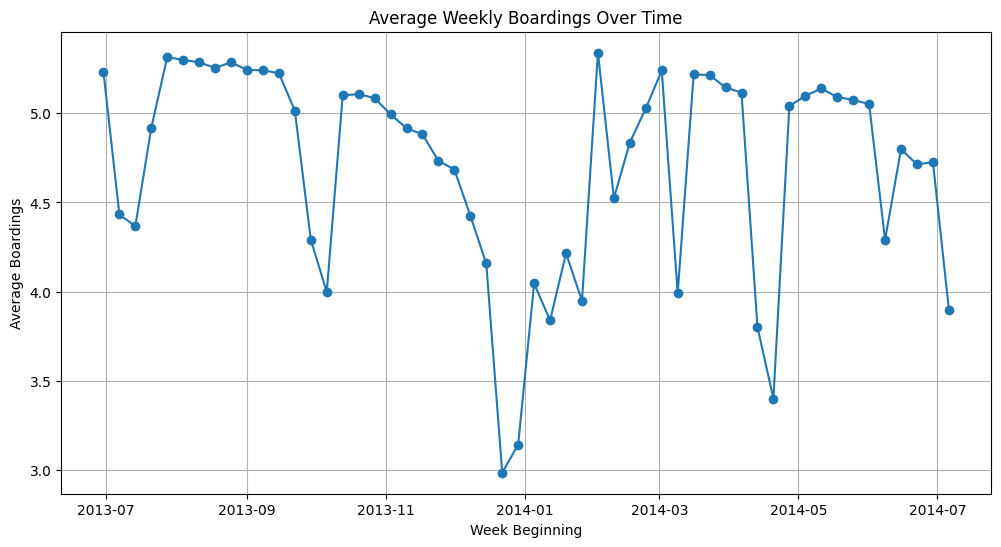

In [14]:
# plot average weekly boardings over time

# group data by 'WeekBeginning' and calculate mean boardings for each week
weekly_data = data.groupby('WeekBeginning')['NumberOfBoardings'].mean()

# create line plot to visualize trend of boardings over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o', linestyle='-')
plt.title('Average Weekly Boardings Over Time')
plt.xlabel('Week Beginning')
plt.ylabel('Average Boardings')
plt.grid(True)
plt.show()

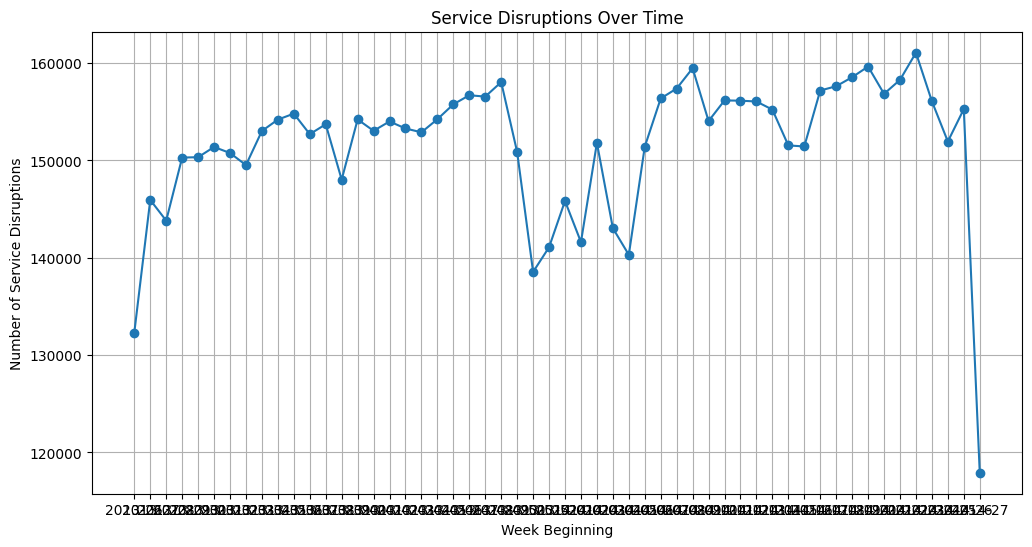

In [16]:
# plot service disruptions over time (weekly)

# group data by week and count number of service disruptions
weekly_disruptions = data.groupby(data['WeekBeginning'].dt.strftime('%Y-%U'))['ServiceDisruption'].sum()

# create a line plot to visualize service disruptions over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_disruptions.index, weekly_disruptions.values, marker='o', linestyle='-')
plt.title('Service Disruptions Over Time')
plt.xlabel('Week Beginning')
plt.ylabel('Number of Service Disruptions')
plt.grid(True)
plt.show()

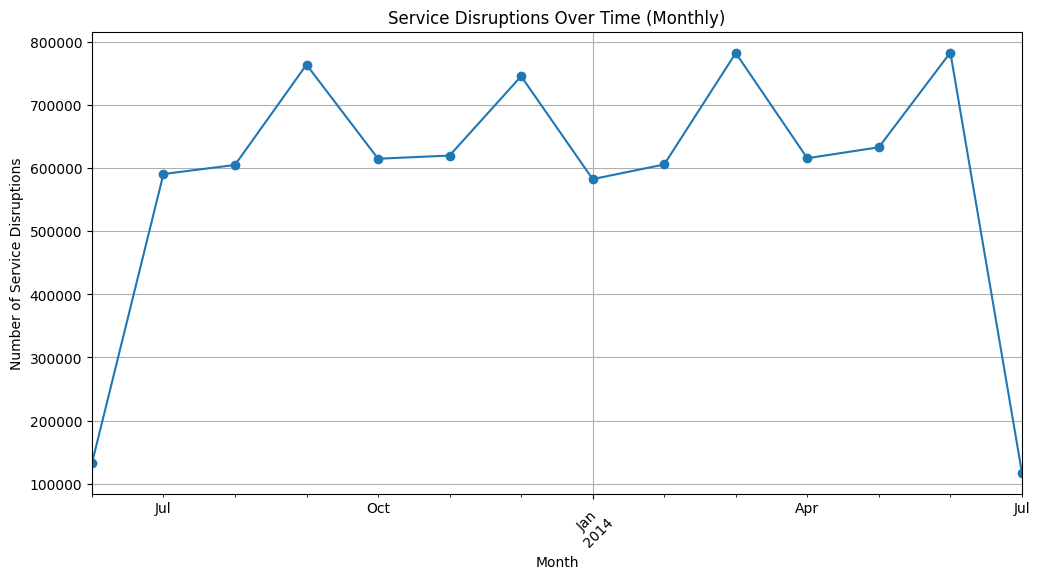

In [20]:
# plot service disruptions over time (monthly)

# group data by month and count the number of service disruptions
monthly_disruptions = data.groupby(data['WeekBeginning'].dt.to_period('M'))['ServiceDisruption'].sum()

# create a line plot to visualize service disruptions over time
plt.figure(figsize=(12, 6))
monthly_disruptions.plot(marker='o', linestyle='-')
plt.title('Service Disruptions Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Service Disruptions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The visualizations reveal trends in passenger boardings and service disruptions over time, enabling informed decision-making for improved public transportation services. This data-driven approach enhances overall efficiency and passenger experience.
****
4. **Sentiment Analysis for Passenger Feedback**
    1. Data Preprocessing
        * For sentiment analysis, we need to extract and clean the text data containing passenger feedback.
        * Load the dataset using Pandas.
        * Select relevant columns for sentiment analysis (e.g., TripID, StopName).
        * Remove duplicates and any irrelevant entries.
        * Handle missing data, if any.
   ****
    2. Text Preprocessing
        * The text data may contain noise and irrelevant information. Text preprocessing is essential to ensure the accuracy of sentiment analysis.
        * Tokenization: Split text into words.
        * Lowercasing: Convert all text to lowercase.
        * Removing special characters and punctuation.
        * Stopword Removal: Eliminate common words (e.g., "the," "and") that do not carry sentiment.
        * Lemmatization or stemming to reduce words to their base form.
   ****
    3. Model Selection
        **VADER Model for Sentiment Analysis:**
        * VADER is a specialized NLP model for sentiment analysis.
        * It provides polarity and intensity scores.
        * Suitable for real-time analysis and informal text.
        * Ideal for public transportation feedback analysis.
  
          **Advantages of Using VADER for Feedback Analysis:**
            * Fast and real-time analysis.
            * No need for training on specific datasets.
            * Tailored for informal text, like social media feedback.
            * Offers both polarity and intensity scores.
            * Ready-made for social media content.
            * Easy implementation and accessibility.
            * Quick insights into passenger sentiment.
   ****
    4. Feature Engineering
        * Create additional features or transformations that could enhance the analysis, such as time-based aggregations, seasonality, or weather data.
        * Machine Learning Model Development
        * Random Forest is an ensemble learning method that can be used for public transportation analysis as it can handle complex, multifaceted data.
        * It combines multiple decision trees for enhanced accuracy and robustness.
        * The Random Forest model has high accuracy, can handle large datasets, reduces overfitting, is robust to outliers and handles non-linearity.
    ****
    5. Model Training and Validation
        - Split the dataset into training and testing sets.
        - Train the models for both service disruption prediction and overall analysis.
        - Evaluate the model's performance using relevant metrics.
        - Fine-tune the models if necessary.
    ****
    6. Integration with IBM Cognos
        - Integrate the machine learning and sentiment analysis results into IBM Cognos for streamlined data analytics and reporting.
    ****
    7. Data Visualization and Reporting
        - Create dashboards and reports in IBM Cognos to display insights from the analysis.
        - Utilize charts, graphs, and maps to make the results easily interpretable for decision-makers.
****
**Conclusion:**

By following these steps, we can effectively enhance public transportation analysis by predicting service disruptions and analyzing passenger sentiment, ultimately leading to improvements in the transportation system.
****
**TEAM MEMBERS:**
* Yasvinippriyaa S K - 2021506126
* Tejasree M S - 2021506113
* Vaishnavi V - 2021506116
* Sreenithi B - 2021506105
* Subithra C - 2021506109